In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [3]:
data = pd.read_csv("../02_data_preparation/yoghurt_w_dummy_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21251 entries, 0 to 21250
Data columns (total 67 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 21251 non-null  int64  
 1   first_purchase             21251 non-null  bool   
 2   shelf_price                21251 non-null  float64
 3   pct_disc                   21251 non-null  float64
 4   pct_retail_disc            21251 non-null  float64
 5   pct_coupon_disc            21251 non-null  float64
 6   display_1                  21251 non-null  int64  
 7   display_2                  21251 non-null  int64  
 8   display_3                  21251 non-null  int64  
 9   display_4                  21251 non-null  int64  
 10  display_5                  21251 non-null  int64  
 11  display_6                  21251 non-null  int64  
 12  display_7                  21251 non-null  int64  
 13  display_9                  21251 non-null  int

In [4]:
data.drop(labels=["Unnamed: 0", "display_1", "display_5", "display_A", "campaign_6.0", "campaign_30.0", "description_TypeC"],
          axis = 1, inplace = True)

In [5]:
pd.set_option("display.max_columns", None)
data.describe(include = "all")

,first_purchase,shelf_price,pct_disc,pct_retail_disc,pct_coupon_disc,display_2,display_3,display_4,display_6,display_7,display_9,mailer_A,mailer_C,mailer_D,mailer_H,mailer_J,marital_status_A,marital_status_B,homeowner_Homeowner,homeowner_Probable Owner,homeowner_Probable Renter,homeowner_Renter,hhcomp_1 Adult Kids,hhcomp_2 Adults Kids,hhcomp_2 Adults No Kids,hhcomp_Single Female,hhcomp_Single Male,kid_category_1,kid_category_2,kid_category_3+,kid_category_None/Unknown,age_19-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,income_100-124K,income_125-149K,income_15-24K,income_150-174K,income_175-199K,income_200-249K,income_25-34K,income_250K+,income_35-49K,income_50-74K,income_75-99K,income_Under 15K,hhsize_1,hhsize_2,hhsize_3,hhsize_4,hhsize_5+,campaign_8.0,campaign_13.0,campaign_18.0,campaign_29.0,description_TypeA,description_TypeB
count,21251,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.00000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000,21251.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,14083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.156933,0.158316,0.153330,0.004987,0.011152,0.007623,0.001082,0.005459,0.012046,0.004047,0.148699,0.001223,0.048751,0.008235,0.005270,0.488918,0.125406,0.686321,0.015152,0.005176,0.037834,0.061974,0.295092,0.314009,0.147711,0.122677,0.159240,0.098537,0.102254,0.63997,0.042727,0.211896,0.276975,0.347701,0.067009,0.053692,0.080420,0.074820,0.054586,0.085972,0.017646,0.006870,0.079384,0.017646,0.180086,0.224037,0.126394,0.052139,0.280975,0.374476,0.156746,0.089596,0.098207,0.076373,0.077879,0.075855,0.006776,0.230248,0.006776
std,NaN,1.104681,0.145841,0.137543,0.044610,0.105017,0.086979,0.032881,0.073682,0.109096,0.063488,0.355800,0.034958,0.215351,0.090374,0.072407,0.499889,0.331186,0.463999,0.122161,0.071761,0.190798,0.241113,0.456095,0.464131,0.354821,0.328073,0.365908,0.298046,0.302989,0.48002,0.202247,0.408661,0.447515,0.476252,0.250043,0.225413,0.271948,0.263107,0.227175,0.280330,0.131665,0.082604,0.270344,0.131665,0.384268,0.416956,0.332301,0.222312,0.449486,0.483999,0.363569,0.285609,0.297602,0.265600,0.267987,0.264773,0.082040,0.421001,0.082040
min,NaN,0.350000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.400000,0.

In [5]:
X = data.drop("first_purchase", axis = 1)
y = data["first_purchase"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, stratify = y)

In [7]:
cv = StratifiedShuffleSplit(n_splits = 5) 

#Stacking the models

In [11]:
estimators = [
    ("rf_3", RandomForestClassifier(n_jobs = -1, class_weight = "balanced",
                             max_depth = 20, max_samples = 0.7, min_samples_split = 6, n_estimators = 250, random_state = 42)),
    ("xgb_2", xgb.XGBClassifier(scale_pos_weight = 1.965, colsample_bytree = 0.6, colsample_bynode = 0.8, colsample_bylevel = 0.5, 
                                max_delta_step = 1, tree_method = "hist", objective = "binary:logistic",
                         alpha = 1, reg_lambda = 2, learning_rate = 0.2, max_depth = 14, min_child_weight = 3,
                         n_estimators = 300, subsample = 0.8, random_state = 42)),
    ("lgbm_5", lgb.LGBMClassifier(objective = "binary", is_unbalance = True, max_depth = 9, colsample_bytree = 0.8,
                             learning_rate= 0.5,  max_bin= 25,  min_child_samples= 50,  n_estimators= 400, 
                             num_leaves= 70,  reg_alpha= 1, boosting_type = "gbdt", subsample = 0.7, subsample_freq = 2, random_state =42)),
    ("lgbm_unbalanced", lgb.LGBMClassifier(objective = "binary", max_depth = 9, 
                                      boosting_type = 'gbdt', colsample_bytree = 0.8, learning_rate= 0.5,  max_bin= 40, 
                                      min_child_samples= 50,  n_estimators= 400, num_leaves= 70,  reg_alpha= 0, random_state =42))]

In [12]:
estimators_all = [
    ("clf_fav_model_balanced", DecisionTreeClassifier(ccp_alpha= 1e-05,  criterion= 'entropy',  max_depth= 25,  min_impurity_decrease= 3e-06, 
                                            min_samples_leaf= 1,  min_samples_split= 6, class_weight = "balanced", random_state = 42)),
    ("rf_3", RandomForestClassifier(n_jobs = -1, class_weight = "balanced",
                             max_depth = 20, max_samples = 0.7, min_samples_split = 6, n_estimators = 250, random_state = 42)),
    ("rf_unbalanced", RandomForestClassifier(n_jobs = -1, 
                             max_depth = 30, max_samples = 0.7, min_samples_split = 6, n_estimators = 250, random_state = 42)),
    ("xgb_2", xgb.XGBClassifier(scale_pos_weight = 1.965, colsample_bytree = 0.6, colsample_bynode = 0.8, colsample_bylevel = 0.5, 
                                max_delta_step = 1, tree_method = "hist", objective = "binary:logistic",
                         alpha = 1, reg_lambda = 2, learning_rate = 0.2, max_depth = 14, min_child_weight = 3,
                         n_estimators = 300, subsample = 0.8, random_state = 42)),
    ("xgb_2_unbalanced", xgb.XGBClassifier(colsample_bytree = 0.6, colsample_bynode = 0.8, colsample_bylevel = 0.5, 
                                max_delta_step = 1, tree_method = "hist", objective = "binary:logistic",
                         alpha = 0, reg_lambda = 7, learning_rate = 0.2, max_depth = 14, min_child_weight = 3,
                         n_estimators = 400, subsample = 0.8, random_state = 42)),
    ("lgbm_5", lgb.LGBMClassifier(objective = "binary", is_unbalance = True, max_depth = 9, colsample_bytree = 0.8,
                             learning_rate= 0.5,  max_bin= 25,  min_child_samples= 50,  n_estimators= 400, 
                             num_leaves= 70,  reg_alpha= 1, boosting_type = "gbdt", subsample = 0.7, subsample_freq = 2, random_state =42)),
    ("lgbm_unbalanced", lgb.LGBMClassifier(objective = "binary", max_depth = 9, 
                                      boosting_type = 'gbdt', colsample_bytree = 0.8, learning_rate= 0.5,  max_bin= 40, 
                                      min_child_samples= 50,  n_estimators= 400, num_leaves= 70,  reg_alpha= 0, random_state =42))]

In [23]:
stacked = StackingClassifier(estimators = estimators_all, n_jobs = -1, final_estimator = lgb.LGBMClassifier(), cv=5)

In [24]:
stacked.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('clf_fav_model_balanced',
                                DecisionTreeClassifier(ccp_alpha=1e-05,
                                                       class_weight='balanced',
                                                       criterion='entropy',
                                                       max_depth=25,
                                                       min_impurity_decrease=3e-06,
                                                       min_samples_split=6,
                                                       random_state=42)),
                               ('rf_3',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=20,
                                                       max_samples=0.7,
                                                       min_samples_split=6,
                                                 

In [25]:
y_pred_stacked = stacked.predict(X_test)
#metrics for stacked model - TEST
scores = [f1_score, precision_score, recall_score, accuracy_score]

for score in scores:
    print(score(y_test, y_pred_stacked))

0.629872636047858
0.7052722558340536
0.5690376569037657
0.7744060221124441


#Tune hyperparameters of StackingClassifier

In [28]:
params_stack = {
    "final_estimator": [RandomForestClassifier(), xgb.XGBClassifier(), lgb.LGBMClassifier()],
    "stack_method": ["auto", "predict_proba", "decision_function", "predict"],
    "passthrough": [True, False]}

In [29]:
stack = StackingClassifier(estimators = estimators_all, n_jobs = -1, cv=5)

In [30]:
grid_search_stack = GridSearchCV(stack, param_grid= params_stack, cv=cv, scoring = "f1")
grid_search_stack.fit(X_train, y_train)

C:\Users\Gabriele\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Gabriele\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Gabriele\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py", line 488, in fit
    return super().fit(X, self._le.transform(y), sample_weight)
  File "C:\Users\Gabriele\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py", line 186, in fit
    self.stack_method_ = [
  File

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5,
            random_state=RandomState(MT19937) at 0x1B6B5BEC240,
            test_size=None, train_size=None),
             estimator=StackingClassifier(cv=5,
                                          estimators=[('clf_fav_model_balanced',
                                                       DecisionTreeClassifier(ccp_alpha=1e-05,
                                                                              class_weight='balanced',
                                                                              criterion='entropy',
                                                                              max_depth=25,
                                                                              min_impurity_decrease=3e-06,
                                                                              min_samples_split=6,
                                                                              ran...
                              

In [31]:
grid_search_stack.best_score_

0.6256364936847854

In [32]:
grid_search_stack.best_params_

{'final_estimator': RandomForestClassifier(),
 'passthrough': True,
 'stack_method': 'predict_proba'}

In [34]:
grid_search_stack.cv_results_

{'mean_fit_time': array([54.91280947, 54.71522331, 10.49612365, 56.15151343, 56.49102201,
        57.38010545, 11.06199951, 53.53681369, 56.6400394 , 56.79758697,
        11.2613102 , 57.63636241, 54.8093956 , 57.59791374, 11.11328454,
        54.95304222, 55.61040692, 55.68891439, 13.71685557, 48.14445677,
        55.11614347, 55.14280353, 11.9082283 , 54.76751223]),
 'std_fit_time': array([4.95379624, 2.10120493, 0.33592571, 4.16048258, 3.04701095,
        2.51626131, 0.23434804, 1.11271841, 0.66279753, 1.438665  ,
        0.35661043, 3.8096032 , 1.37107939, 0.79763283, 0.53965937,
        1.55717878, 1.69009574, 2.94692332, 3.34267798, 1.40190892,
        1.66945578, 1.34420848, 0.61715717, 1.64447641]),
 'mean_score_time': array([0.57377253, 0.52535501, 0.        , 0.49822593, 0.49706545,
        0.52985849, 0.        , 0.56939054, 0.49702339, 0.53111811,
        0.        , 0.57145519, 0.56205854, 0.62328544, 0.        ,
        0.5970408 , 0.6398479 , 0.65181503, 0.        , 0.47

In [37]:
stack_1 = StackingClassifier(estimators = estimators_all, n_jobs = -1, cv=5, 
                            final_estimator= RandomForestClassifier(), passthrough = True, stack_method = "predict_proba")

In [38]:
stack_1.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('clf_fav_model_balanced',
                                DecisionTreeClassifier(ccp_alpha=1e-05,
                                                       class_weight='balanced',
                                                       criterion='entropy',
                                                       max_depth=25,
                                                       min_impurity_decrease=3e-06,
                                                       min_samples_split=6,
                                                       random_state=42)),
                               ('rf_3',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=20,
                                                       max_samples=0.7,
                                                       min_samples_split=6,
                                                 

In [39]:
y_pred_stack_1 = stack_1.predict(X_test)
#metrics for stack_1 model - TEST
scores = [f1_score, precision_score, recall_score, accuracy_score]

for score in scores:
    print(score(y_test, y_pred_stack_1))

0.6319758672699849
0.6880131362889984
0.5843793584379359
0.7704069630675136


In [41]:
stack_2 = StackingClassifier(estimators = estimators_all, n_jobs = -1, cv=5, 
                            final_estimator= lgb.LGBMClassifier(), passthrough = False, stack_method = "predict")

In [42]:
stack_2.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('clf_fav_model_balanced',
                                DecisionTreeClassifier(ccp_alpha=1e-05,
                                                       class_weight='balanced',
                                                       criterion='entropy',
                                                       max_depth=25,
                                                       min_impurity_decrease=3e-06,
                                                       min_samples_split=6,
                                                       random_state=42)),
                               ('rf_3',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=20,
                                                       max_samples=0.7,
                                                       min_samples_split=6,
                                                 

In [43]:
y_pred_stack_2 = stack_2.predict(X_test)
#metrics for stack_2 model - TEST
scores = [f1_score, precision_score, recall_score, accuracy_score]

for score in scores:
    print(score(y_test, y_pred_stack_2))

0.6240120436582611
0.6778413736713
0.5781032078103208
0.7649964714184898


## Tune initial simple model stacked

In [45]:
import scipy

In [48]:
rand_params_stacked = {'final_estimator__max_depth': scipy.stats.randint(5,30), "final_estimator__subsample": np.arange(0.6,1,0.1), 
                       "final_estimator__colsample_bytree": np.arange(0.6,1,0.1), 
                       "final_estimator__n_estimators": scipy.stats.randint(50, 250), 
                       "final_estimator__learning_rate": np.arange(0.05,0.3,0.05), "final_estimator__num_leaves": scipy.stats.randint(5,50), 
                       "final_estimator__boosting_type" : ["gbdt", "dart"]}

In [49]:
rand_search_stacked = RandomizedSearchCV(stacked, rand_params_stacked, n_iter=30, scoring = "f1", cv = cv)
rand_search_stacked.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=5,
            random_state=RandomState(MT19937) at 0x1B6B5BEC240,
            test_size=None, train_size=None),
                   estimator=StackingClassifier(cv=5,
                                                estimators=[('clf_fav_model_balanced',
                                                             DecisionTreeClassifier(ccp_alpha=1e-05,
                                                                                    class_weight='balanced',
                                                                                    criterion='entropy',
                                                                                    max_depth=25,
                                                                                    min_impurity_decrease=3e-06,
                                                                                    min_samples_split...
                                        'final_estimator__max

In [50]:
rand_search_stacked.best_score_

0.6185907535689253

In [52]:
rand_search_stacked.best_params_

{'final_estimator__boosting_type': 'dart',
 'final_estimator__colsample_bytree': 0.8999999999999999,
 'final_estimator__learning_rate': 0.25,
 'final_estimator__max_depth': 8,
 'final_estimator__n_estimators': 146,
 'final_estimator__num_leaves': 17,
 'final_estimator__subsample': 0.6}

In [51]:
from plotting import plot_learning_curve, plot_validation_curve

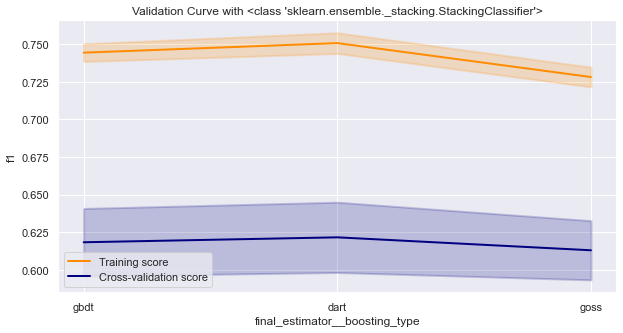

In [54]:
val_boosting_type = plot_validation_curve(stacked, X_train, y_train, cv = cv, 
                                      param_name ="final_estimator__boosting_type", param_range = ["gbdt", "dart", "goss"], scoring = "f1")

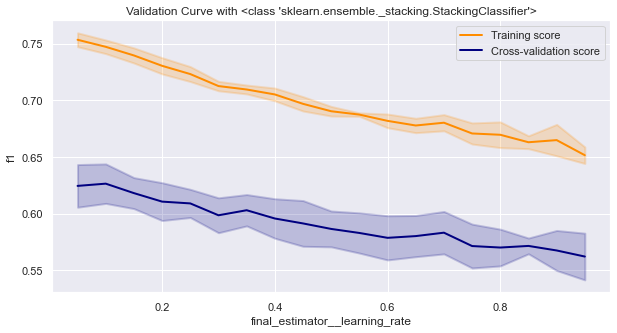

In [55]:
val_learning_rate = plot_validation_curve(stacked, X_train, y_train, cv=cv,
                                              param_name = "final_estimator__learning_rate", param_range = np.arange(0.05,1,0.05), scoring="f1")

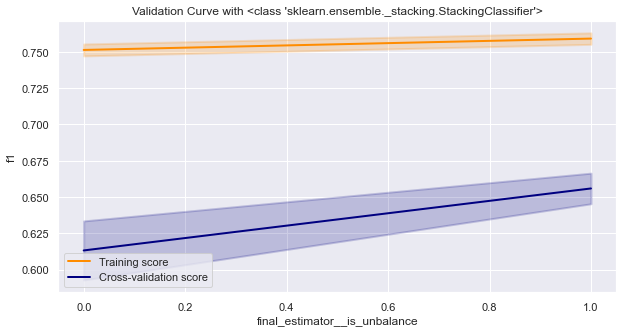

In [56]:
val_is_unbalance = plot_validation_curve(stacked, X_train, y_train, cv=cv,
                                              param_name = "final_estimator__is_unbalance", param_range = [True, False], scoring="f1")

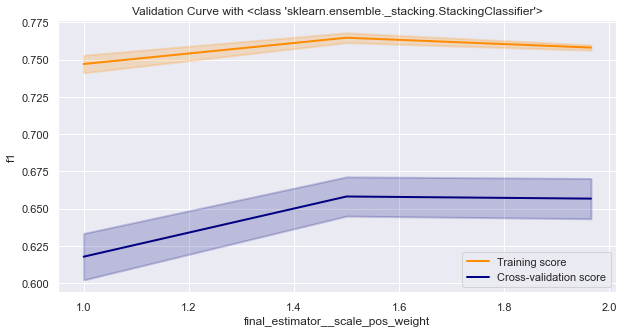

In [57]:
val_scale_pos_weight = plot_validation_curve(stacked, X_train, y_train, cv=cv,
                                              param_name = "final_estimator__scale_pos_weight", param_range = [1, 1.5, 1.965], scoring="f1")

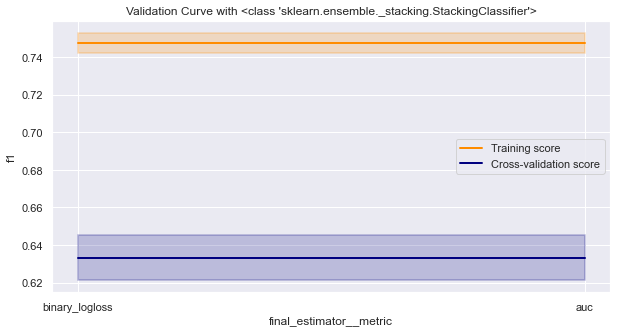

In [58]:
val_metric = plot_validation_curve(stacked, X_train, y_train, cv=cv,
                                              param_name = "final_estimator__metric", param_range = ["binary_logloss", "auc"], scoring="f1")

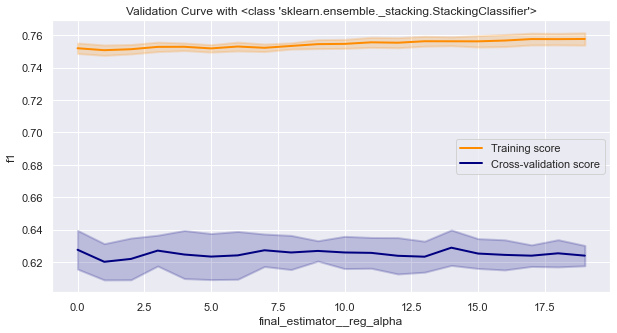

In [59]:
val_lambda_l1 = plot_validation_curve(stacked, X_train, y_train, cv=cv,
                                              param_name = "final_estimator__reg_alpha", param_range = np.arange(0,20,1), scoring="f1")

In [60]:
val_lambda_l2 = plot_validation_curve(stacked, X_train, y_train, cv=cv,
                                              param_name = "final_estimator__reg_lambda", param_range = np.arange(0,20,1), scoring="f1")

KeyboardInterrupt: 

In [ ]:
val_num_leaves = plot_validation_curve(stacked, X_train, y_train, cv=cv,
                                              param_name = "final_estimator__num_leaves", param_range = np.arange(10,100,5), scoring="f1")

In [ ]:
val_max_depth = plot_validation_curve(stacked, X_train, y_train, cv=cv,
                                              param_name = "final_estimator__max_depth", param_range = np.arange(2,15,1), scoring="f1")

In [ ]:
val_colsample_bytree = plot_validation_curve(stacked, X_train, y_train, cv=cv,
                                              param_name = "final_estimator__colsample_bytree", param_range = np.arange(0.2, 1, 0.1), scoring="f1")

In [ ]:
val_max_bin = plot_validation_curve(stacked, X_train, y_train, cv=cv,
                                              param_name = "final_estimator__max_bin", param_range = np.arange(5, 60, 5), scoring="f1")

In [ ]:
val_min_child_samples = plot_validation_curve(stacked, X_train, y_train, cv=cv,
                                              param_name = "final_estimator__min_child_samples", param_range = np.arange(5, 100, 5), scoring="f1")

In [ ]:
val_min_child_samples = plot_validation_curve(stacked, X_train, y_train, cv=cv,
                                              param_name = "final_estimator__min_child_samples", param_range = np.arange(20, 500, 20), scoring="f1")

In [ ]:
val_min_split_gain = plot_validation_curve(stacked, X_train, y_train, cv=cv,
                                              param_name = "final_estimator__min_split_gain", param_range = np.arange(0, 15, 1), scoring="f1")

In [ ]:
val_n_estimators = plot_validation_curve(stacked, X_train, y_train, cv=cv,
                                              param_name = "final_estimator__n_estimators", param_range = np.arange(50, 500, 25), scoring="f1")